In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt

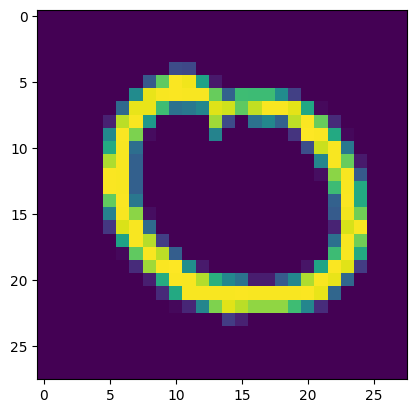

In [ ]:
plt.imshow(x_train[108])

In [ ]:
x_train/255
y_train/255

array([0.01960784, 0.        , 0.01568627, ..., 0.01960784, 0.02352941,
       0.03137255])

In [ ]:
Model= Sequential()
Model.add(Flatten(input_shape=(28,28)))
Model.add(Dense(128,activation="relu"))
Model.add(Dense(32,activation="relu"))
Model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history=Model.fit(x_train,y_train,epochs=10,validation_split=0.02)

Epoch 1/10
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3742 - loss: 3.4593 - val_accuracy: 0.6208 - val_loss: 1.0685
Epoch 2/10
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6495 - loss: 0.9518 - val_accuracy: 0.7658 - val_loss: 0.5883
Epoch 3/10
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7528 - loss: 0.6245 - val_accuracy: 0.9317 - val_loss: 0.3899
Epoch 4/10
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9046 - loss: 0.3952 - val_accuracy: 0.9483 - val_loss: 0.2691
Epoch 5/10
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9518 - loss: 0.1974 - val_accuracy: 0.9625 - val_loss: 0.2020
Epoch 6/10
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9619 - loss: 0.1547 - val_accuracy: 0.9708 - val_loss: 0.1343
Epoch 7/10
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9680 - loss: 0.1210 - val_accuracy: 0.9650 - val_loss: 0.1727
Epoch 8/10
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9721 - loss: 0.1045 -

In [ ]:
Model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 314,816 (1.20 MB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 209,878 (819.84 KB)

In [ ]:
y_prob=Model.predict(x_test)
y_pred=y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
(accuracy_score(y_test,y_pred)*100)

96.2

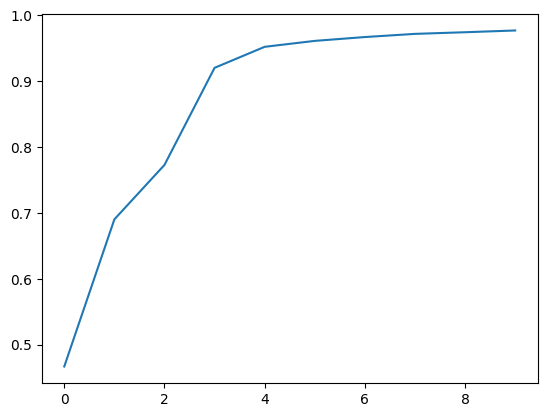

In [ ]:
plt.plot(history.history["accuracy"])